## 数据分析实战—北京二手房房价分析
链接：https://mp.weixin.qq.com/s/97OL4IqVIBP0PwGlYcUZvg


链接：https://mp.weixin.qq.com/s/6aCI9PABHZccThrGqak6Lg

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline


# 检查Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

In [53]:
# 导入链家二手房数据
lianjia_df = pd.read_csv('../data/lianjia.csv')
display(lianjia_df.head(n=10))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,2003
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,1992
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,1999
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,2002


初步观察到一共有11个特征变量，Price 在这里是我们的目标变量，然后我们继续深入观察一下。

In [54]:
# 检查缺失值情况
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


发现了数据集一共有23677条数据，其中Elevator特征有明显的缺失值。

In [55]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


上面结果给出了特征值是数值的一些统计值，包括平均数，标准差，中位数，最小值，最大值，25%分位数，75%分位数。这些统计结果简单直接，对于初始了解一个特征好坏非常有用，比如我们观察到 Size 特征 的最大值为1019平米，最小值为2平米，那么我们就要思考这个在实际中是不是存在的，如果不存在没有意义，那么这个数据就是一个异常值，会严重影响模型的性能。


当然，这只是初步观察，后续我们会用数据可视化来清晰的展示，并证实我们的猜测。

In [56]:
# 添加新特征房屋均价
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

# 重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)

# 重新审视数据集
display(df.head(n=10))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0
5,东城,广渠门,幸福家园二期,2室1厅,18,2003,111.0,有电梯,南北,其他,10.630631,1180.0
6,东城,西罗园,西革新里110号院,1室1厅,6,1992,42.0,无电梯,南,其他,7.595238,319.0
7,东城,西罗园,建予园,2室1厅,16,1999,105.0,有电梯,南,其他,6.095238,640.0
8,东城,东花市,富贵园一区,3室2厅,9,2003,161.0,有电梯,南北,精装,11.055901,1780.0
9,东城,东直门,万国城MOMA,2室2厅,25,2002,127.0,有电梯,东北,精装,10.236220,1300.0


我们发现 Id 特征其实没有什么实际意义，所以将其移除。由于房屋单价分析起来比较方便，简单的使用总价/面积就可得到，所以增加一个新的特征 PerPrice（只用于分析，不是预测特征）。另外，特征的顺序也被调整了一下，看起来比较舒服。

数据可视化分析，Region特征分析
对于区域特征，我们可以分析不同区域房价和数量的对比

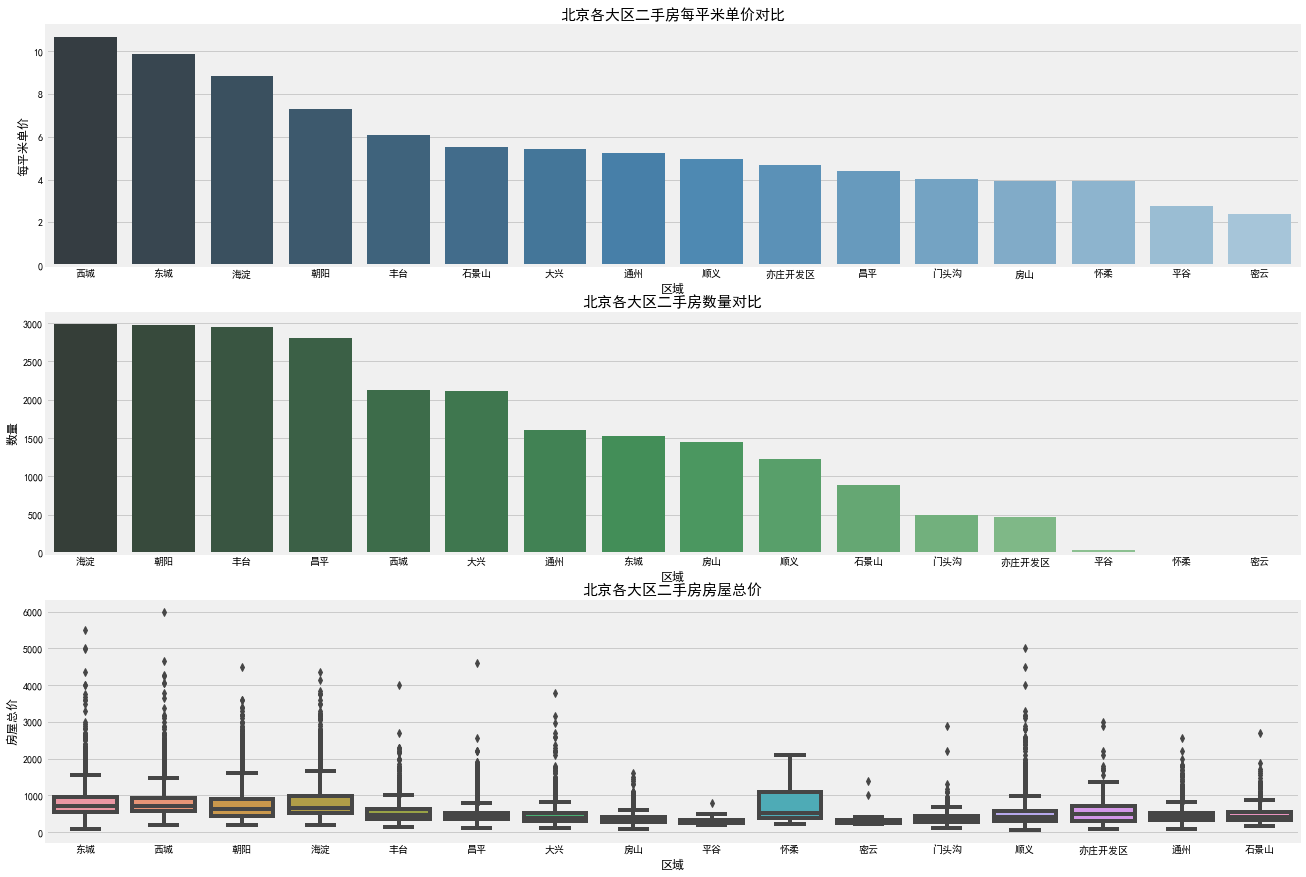

In [57]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

使用了pandas的网络透视功能 groupby 分组排序。区域特征可视化直接采用 seaborn 完成，颜色使用调色板 palette 参数，颜色渐变，越浅说明越少，反之越多。
可以观察到：

    二手房均价：西城区的房价最贵均价大约11万/平，因为西城在二环以里，且是热门学区房的聚集地。其次是东城大约10万/平，然后是海淀大约8.5万/平，其它均低于8万/平。

    二手房房数量：从数量统计上来看，目前二手房市场上比较火热的区域。海淀区和朝阳区二手房数量最多，差不多都接近3000套，毕竟大区，需求量也大。然后是丰台区，近几年正在改造建设，有赶超之势。

    二手房总价：通过箱型图看到，各大区域房屋总价中位数都都在1000万以下，且房屋总价离散值较高，西城最高达到了6000万，说明房屋价格特征不是理想的正太分布。


Size特征分析

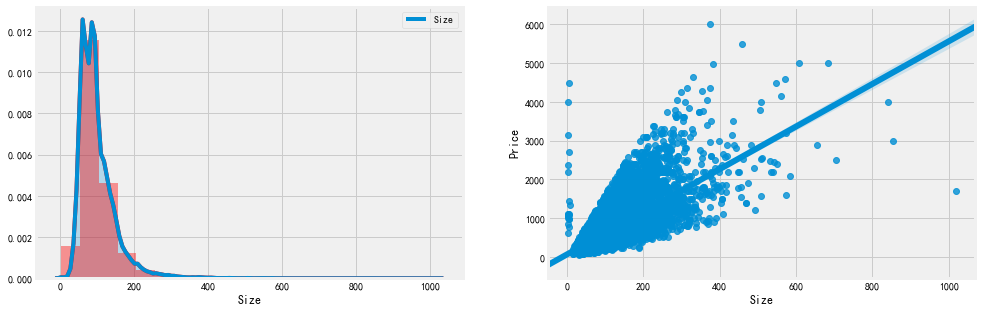

In [58]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 建房时间的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

Size 分布：


通过 distplot  和 kdeplot 绘制柱状图观察 Size 特征的分布情况，属于长尾类型的分布，这说明了有很多面积很大且超出正常范围的二手房。

Size 与 Price 的关系：


通过 regplot 绘制了 Size 和 Price 之间的散点图，发现 Size 特征基本与Price呈现线性关系，符合基本常识，面积越大，价格越高。但是有两组明显的异常点：1. 面积不到10平米，但是价格超出10000万；2. 一个点面积超过了1000平米，价格很低，需要查看是什么情况。

In [100]:
df['Year']

0        (1949.999, 1990.0]
1        (1949.999, 1990.0]
2          (1990.0, 1997.0]
3          (2003.0, 2005.0]
4          (2007.0, 2011.0]
5          (2000.0, 2003.0]
6          (1990.0, 1997.0]
7          (1997.0, 2000.0]
8          (2000.0, 2003.0]
9          (2000.0, 2003.0]
10       (1949.999, 1990.0]
11       (1949.999, 1990.0]
12         (2003.0, 2005.0]
13         (1997.0, 2000.0]
14         (2000.0, 2003.0]
15       (1949.999, 1990.0]
16       (1949.999, 1990.0]
17         (2007.0, 2011.0]
18       (1949.999, 1990.0]
19         (2005.0, 2007.0]
20         (1997.0, 2000.0]
21       (1949.999, 1990.0]
22         (1990.0, 1997.0]
23         (1990.0, 1997.0]
24         (1990.0, 1997.0]
25       (1949.999, 1990.0]
26         (2000.0, 2003.0]
27         (1997.0, 2000.0]
28       (1949.999, 1990.0]
29         (1997.0, 2000.0]
                ...        
23647      (1990.0, 1997.0]
23648    (1949.999, 1990.0]
23649      (1990.0, 1997.0]
23650      (2007.0, 2011.0]
23651    (1949.999, 

In [59]:
df.loc[df['Size']< 10]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


经过查看发现这组数据是别墅，出现异常的原因是由于别墅结构比较特殊（无朝向无电梯），字段定义与二手商品房不太一样导致爬虫爬取数据错位。也因别墅类型二手房不在我们的考虑范围之内，故将其移除再次观察Size分布和Price关系。

In [60]:
df.loc[df['Size']>1000]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


经观察这个异常点不是普通的民用二手房，很可能是商用房，所以才有1房间0厅确有如此大超过1000平米的面积，这里选择移除。

In [61]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

重新进行可视化发现就没有明显的异常点了。


Layout特征分析

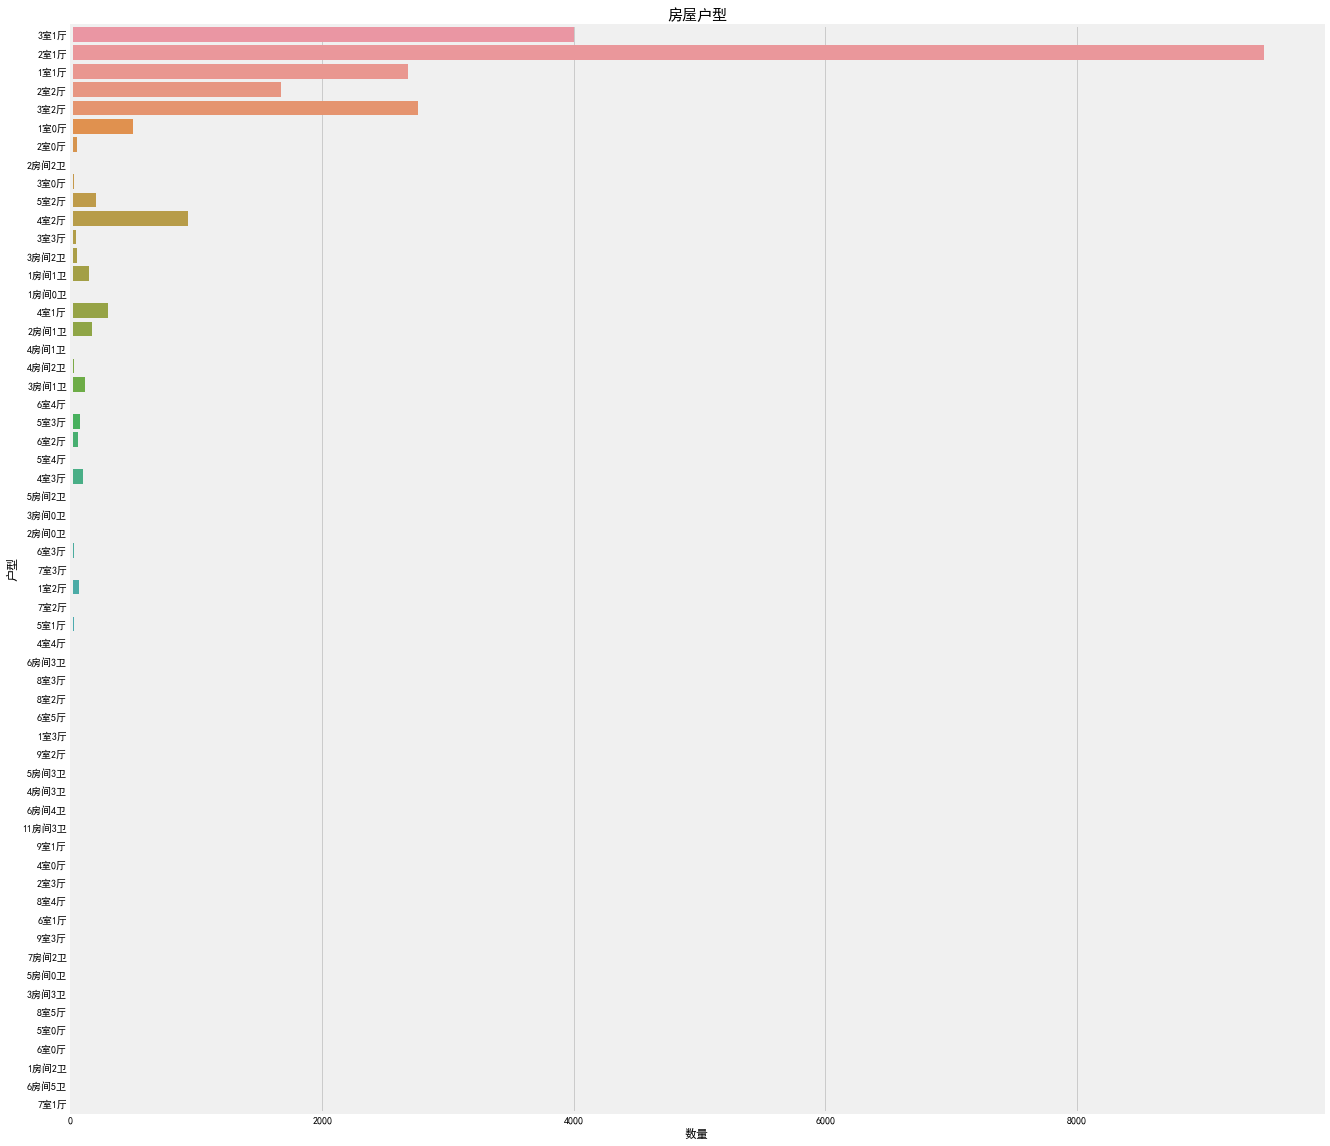

In [62]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

这个特征真是不看不知道，各种厅室组合搭配，竟然还有9室3厅，4室0厅等奇怪的结构。其中，2室一厅占绝大部分，其次是3室一厅，2室2厅，3室两厅。但是仔细观察特征分类下有很多不规则的命名，比如2室一厅与2房间1卫，还有别墅，没有统一的叫法。这样的特征肯定是不能作为机器学习模型的数据输入的，需要使用特征工程进行相应的处理。

In [63]:
df['Renovation'].value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

发现Renovation装修特征中竟然有南北，它属于朝向的类型，可能是因为爬虫过程中一些信息位置为空，导致“Direction”朝向特征出现在这里，所以需要清除或替换掉。

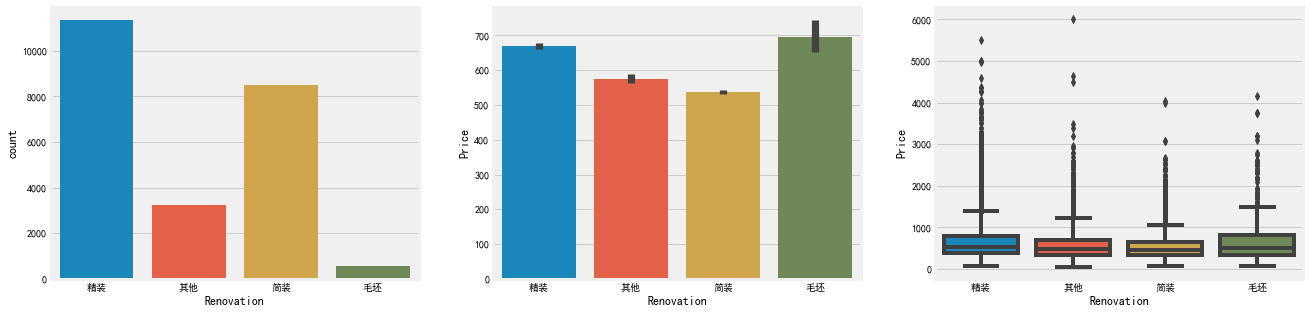

In [64]:
# 去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']

# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

观察到，精装修的二手房数量最多，简装其次，也是我们平日常见的。而对于价格来说，毛坯类型却是最高，其次是精装修。

Elevator 特征分析

初探数据的时候，我们发现 Elevator 特征是有大量缺失值的，这对于我们是十分不利的，首先我们先看看有多少缺失值：

In [65]:
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))

Elevator缺失值数量为：8237


这么多的缺失值怎么办呢？这个需要根据实际情况考虑，常用的方法有平均值/中位数填补法，直接移除，或者根据其他特征建模预测等。

这里我们考虑填补法，但是有无电梯不是数值，不存在平均值和中位数，怎么填补呢？这里给大家提供一种思路：就是根据楼层 Floor 来判断有无电梯，一般的楼层大于6的都有电梯，而小于等于6层的一般都没有电梯。有了这个标准，那么剩下的就简单了。

结果观察到，有电梯的二手房数量居多一些，毕竟高层土地利用率比较高，适合北京庞大的人群需要，而高层就需要电梯。相应的，有电梯二手房房价较高，因为电梯前期装修费和后期维护费包含内了（但这个价格比较只是一个平均的概念，比如无电梯的6层豪华小区当然价格更高了）。

Year 特征分析

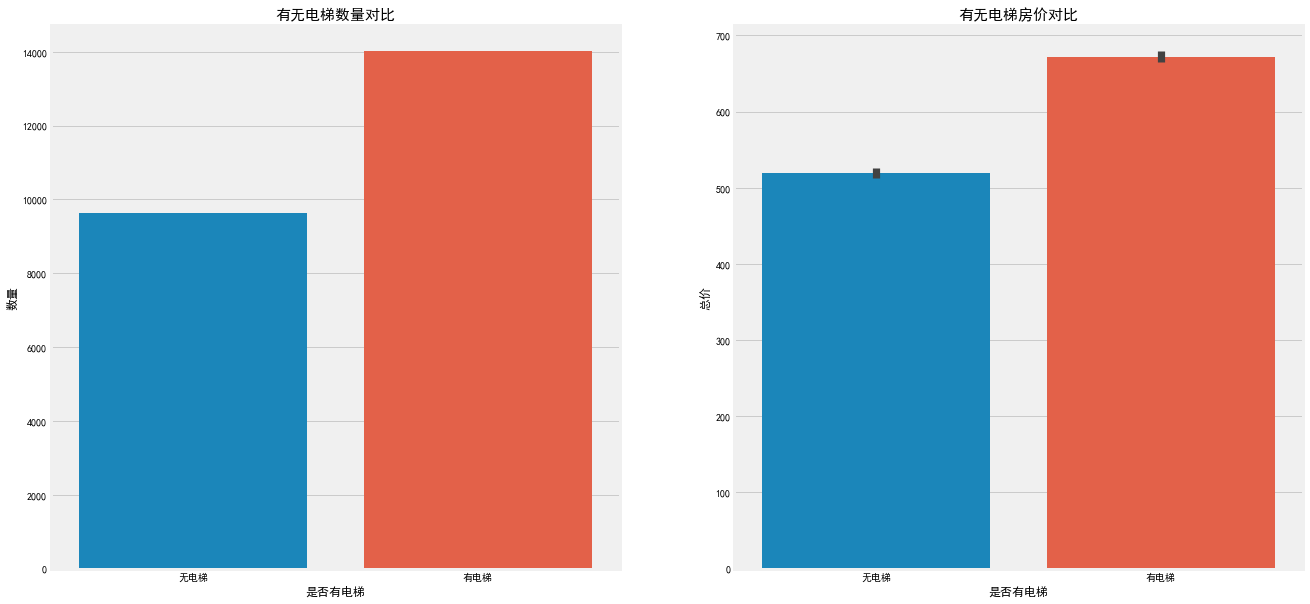

In [66]:
# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']

# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

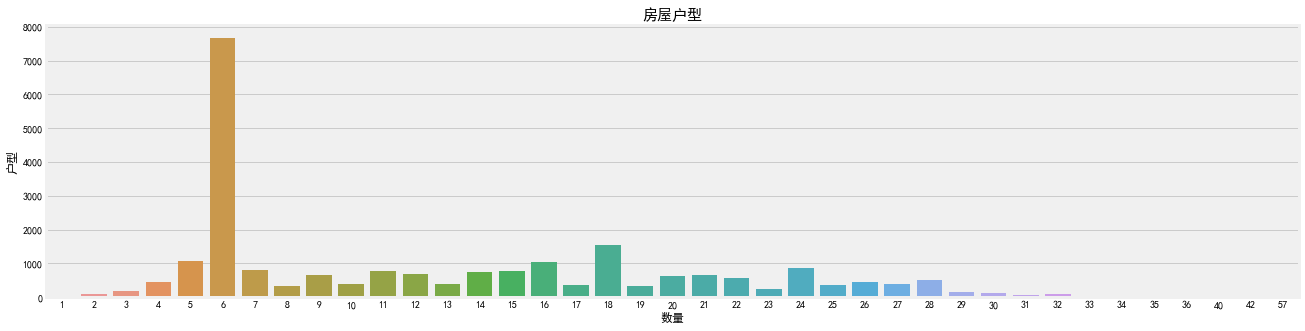

In [68]:
#Floor 特征分析
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [93]:
df.head(10)

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,"(1949.999, 1990.0]",75.0,无电梯,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,"(1949.999, 1990.0]",60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,"(1990.0, 1997.0]",210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,"(2003.0, 2005.0]",39.0,有电梯,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,"(2007.0, 2011.0]",90.0,有电梯,南,精装,11.088889,998.0
5,东城,广渠门,幸福家园二期,2室1厅,18,"(2000.0, 2003.0]",111.0,有电梯,南北,其他,10.630631,1180.0
6,东城,西罗园,西革新里110号院,1室1厅,6,"(1990.0, 1997.0]",42.0,无电梯,南,其他,7.595238,319.0
7,东城,西罗园,建予园,2室1厅,16,"(1997.0, 2000.0]",105.0,有电梯,南,其他,6.095238,640.0
8,东城,东花市,富贵园一区,3室2厅,9,"(2000.0, 2003.0]",161.0,有电梯,南北,精装,11.055901,1780.0
9,东城,东直门,万国城MOMA,2室2厅,25,"(2000.0, 2003.0]",127.0,有电梯,东北,精装,10.236220,1300.0


C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


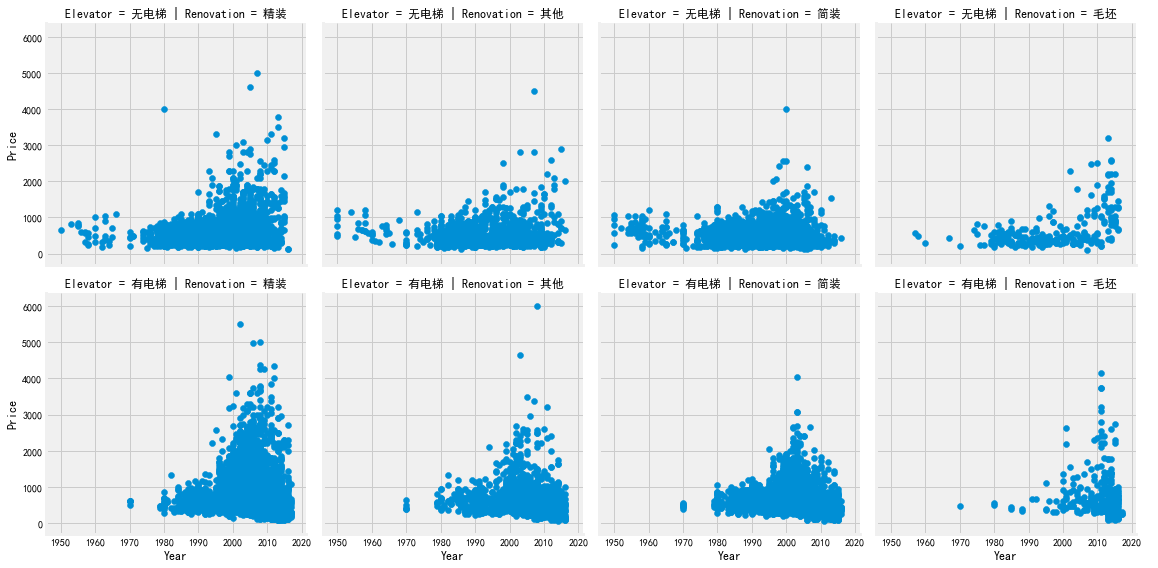

In [67]:
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

在Renovation和Elevator的分类条件下，使用 FaceGrid 分析 Year 特征，观察结果如下：
整个二手房房价趋势是随着时间增长而增长的；

2000年以后建造的二手房房价相较于2000年以前有很明显的价格上涨；

1980年之前几乎不存在有电梯二手房数据，说明1980年之前还没有大面积安装电梯；

1980年之前无电梯二手房中，简装二手房占绝大多数，精装反而很少；

可以看到，6层二手房数量最多，但是单独的楼层特征没有什么意义，因为每个小区住房的总楼层数都不一样，我们需要知道楼层的相对意义。另外，楼层与文化也有很重要联系，比如中国文化七上八下，七层可能受欢迎，房价也贵，而一般也不会有4层或18层。当然，正常情况下中间楼层是比较受欢迎的，价格也高，底层和顶层受欢迎度较低，价格也相对较低。所以楼层是一个非常复杂的特征，对房价影响也比较大。

特征工程包括的内容很多，有特征清洗，预处理，监控等，而预处理根据单一特征或多特征又分很多种方法，如归一化，降维，特征选择，特征筛选等等。这么多的方法，为的是什么呢？其目的是让这些特征更友好的作为模型的输入，处理数据的好坏会严重的影响模型性能，而好的特征工程有的时候甚至比建模调参更重要。

In [91]:
df.head(10)

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,"(1949.999, 1990.0]",75.0,无电梯,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,"(1949.999, 1990.0]",60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,"(1990.0, 1997.0]",210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,"(2003.0, 2005.0]",39.0,有电梯,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,"(2007.0, 2011.0]",90.0,有电梯,南,精装,11.088889,998.0
5,东城,广渠门,幸福家园二期,2室1厅,18,"(2000.0, 2003.0]",111.0,有电梯,南北,其他,10.630631,1180.0
6,东城,西罗园,西革新里110号院,1室1厅,6,"(1990.0, 1997.0]",42.0,无电梯,南,其他,7.595238,319.0
7,东城,西罗园,建予园,2室1厅,16,"(1997.0, 2000.0]",105.0,有电梯,南,其他,6.095238,640.0
8,东城,东花市,富贵园一区,3室2厅,9,"(2000.0, 2003.0]",161.0,有电梯,南北,精装,11.055901,1780.0
9,东城,东直门,万国城MOMA,2室2厅,25,"(2000.0, 2003.0]",127.0,有电梯,东北,精装,10.236220,1300.0


In [49]:
"""
特征工程
"""
#移除结构类型异常值和房屋大小异常值
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]
#去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation']=df.loc[(df['Renovation']!='南北'),'Renovation']
#由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator']=df.loc[(df['Elevator']=='有电梯')|(df['Elevator']=='无电梯'),'Elevator']

#填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()),'Elevator']='有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()),'Elevator']='无电梯'

#只考虑“室”和“厅”，将其它少数“房间”和“卫”移除
df=df.loc[df['Layout'].str.extract('^d(.*?)d.*?',expand=False)=='室']

#提取“室”和“厅”创建新特征
df['Layout_room_num']=df['Layout'].str.extract('(^d).*',expand=False).astype('int64')
df['Layout_hall_num']=df['Layout'].str.extract('^d.*?(d).*',expand=False).astype('int64')

#按中位数对“Year”特征进行分箱
df['Year']=pd.qcut(df['Year'],8).astype('object')

#对“Direction”特征
d_list_one=['东','西','南','北']
d_list_two=['东西','东南','东北','西南','西北','南北']
d_list_three=['东西南','东西北','东南北','西南北']
d_list_four=['东西南北']
df['Direction']=df['Direction'].apply(direct_func)
df=df.loc[(df['Direction']!='no')&(df['Direction']!='nan')]

#根据已有特征创建新特征
df['Layout_total_num']=df['Layout_room_num']+df['Layout_hall_num']
df['Size_room_ratio']=df['Size']/df['Layout_total_num']

#删除无用特征
df=df.drop(['Layout','PerPrice','Garden'],axis=1)

#对于object特征进行onehot编码
df,df_cat=one_hot_encoder(df)

ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [40]:
"""
特征工程
"""
# 移除结构类型异常值和房屋大小异常值
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

# 去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']

# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']

# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'

# 只考虑“室”和“厅”，将其它少数“房间”和“卫”移除
df = df.loc[df['Layout'].str.extract('^\d(.*?)\d.*?',expand=False) == '室']

# 提取“室”和“厅”创建新特征
df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')

# 按中位数对“Year”特征进行分箱
df['Year'] = pd.qcut(df['Year'],8).astype('object')

# 对“Direction”特征
d_list_one = ['东','西','南','北']
d_list_two = ['东西','东南','东北','西南','西北','南北']
d_list_three = ['东西南','东西北','东南北','西南北']
d_list_four = ['东西南北']    
df['Direction'] = df['Direction'].apply(direct_func)
df = df.loc[(df['Direction']!='no')&(df['Direction']!='nan')]

# 根据已有特征创建新特征
df['Layout_total_num'] = df['Layout_room_num'] + df['Layout_hall_num']
df['Size_room_ratio'] = df['Size']/df['Layout_total_num']

# 删除无用特征
df = df.drop(['Layout','PerPrice','Garden'],axis=1)

# 对于object特征进行onehot编码
df,df_cat = one_hot_encoder(df)

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

由于一些清洗处理在上一篇文章已经提到，博主从17行代码开始。

Layout

先来看看没经处理的Layout特征值是什么样的。

In [26]:
df['Layout'].value_counts()

2室1厅      9485
3室1厅      3999
3室2厅      2765
1室1厅      2681
2室2厅      1671
4室2厅       930
1室0厅       499
4室1厅       295
5室2厅       200
2房间1卫      170
1房间1卫      146
3房间1卫      116
4室3厅        96
5室3厅        75
1室2厅        67
6室2厅        59
3房间2卫       53
2室0厅        50
3室3厅        43
4房间2卫       31
3室0厅        29
6室3厅        29
5室1厅        27
2房间2卫       18
4房间1卫       15
1房间0卫       14
5房间2卫       10
4房间3卫        7
7室3厅         7
7室2厅         6
5房间3卫        6
2室3厅         5
6室4厅         4
8室3厅         4
5室4厅         4
4室4厅         4
3房间0卫        3
6房间4卫        3
4室0厅         3
8室2厅         3
6室0厅         2
3房间3卫        2
2房间0卫        2
6房间3卫        2
1房间2卫        2
5房间0卫        1
6室5厅         1
11房间3卫       1
6房间5卫        1
9室2厅         1
8室5厅         1
7室1厅         1
9室1厅         1
9室3厅         1
7房间2卫        1
8室4厅         1
1室3厅         1
5室0厅         1
6室1厅         1
Name: Layout, dtype: int64

发现特征值并不是像想象中的那么理想。有两种格式的数据，一种是"xx室xx厅"，另一种是"xx房间xx卫"，但是绝大多数都是xx室xx厅的数据。而对于像"11房间3卫"或者"5房间0卫"这些的Layout明显不是民住的二手房（不在我们的考虑范围之内），因此最后决定将所有"xx房间xx卫"格式的数据都移除掉，只保留"xx室xx厅"的数据。

Layout特征的处理如下：

第2行的意思是只保留"xx室xx厅"数据，但是保留这种格式的数据也是不能作为模型的输入的，我们不如干脆将"室"和"厅"都提取出来，单独作为两个新特征（如第5和6行），这样效果可能更好。

具体的用法就是使用 str.extract() 方法，里面写的是正则表达式。

In [27]:
# 只考虑“室”和“厅”，将其它少数“房间”和“卫”移除
df = df.loc[df['Layout'].str.extract('^\d(.*?)\d.*?') == '室']

# 提取“室”和“厅”创建新特征
df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')

ValueError: Cannot index with multidimensional key

还有一个 Year 特征，为建房的年限时间。年限种类很多，分布在1950和2018之间，如果每个不同的 Year 值都作为特征值，我们并不能找出 Year 对 Price 有什么影响，因为年限划分的太细了。因此，我们只有将连续数值型特征 Year 离散化，做分箱处理。

如何分箱还要看实际业务需求，博主为了方便并没有手动分箱，而使用了pandas的 qcut 采用中位数进行分割，分割数为8等份。


In [28]:
# 按中位数对“Year”特征进行分箱
df['Year'] = pd.qcut(df['Year'],8).astype('object')

这是将 Year 进行分箱的结果：

Direction

这个特征没处理之前更乱，原以为是爬虫的问题，但是亲自到链家看过，朝向确实是这样的。

如上所见，像"西南西北北"或者"东东南南"这样的朝向是不符合常识的（反正我是理解不了）。因此，我们需要将这些凌乱的数据进行处理，具体实现方式是博主自己写了一个函数 direct_func，主要思想就是将各种重复但顺序不一样的特征值合并，比如"西南北"和"南西北"，并将不合理的一些值移除，如"西南西北北"等。

然后通过 apply() 方法将 Direction 数据格式转换，代码如下：

In [29]:
# 对“Direction”特征
d_list_one = ['东','西','南','北']
d_list_two = ['东西','东南','东北','西南','西北','南北']
d_list_three = ['东西南','东西北','东南北','西南北']
d_list_four = ['东西南北']    
df['Direction'] = df['Direction'].apply(direct_func)
df = df.loc[(df['Direction']!='no')&(df['Direction']!='nan')]

NameError: name 'direct_func' is not defined

处理完结果如下，所有的内容相同而顺序不同的朝向都合并了，异常朝向也被移除了。

创建新特征

有时候仅靠已有的一些特征是不够的，需要根据对业务的理解，定义一些的新特征，然后尝试这些新特征对模型的影响，在实战中会经常使用这种方法。

这里尝试将"室"与"厅"的数量相加作为一个总数量特征，然后将房屋大小Size与总数量的比值作为一个新特征，可理解为 "每个房间的平均面积大小"。当然，新特征不是固定的，可根据自己的理解来灵活的定义。

In [30]:
# 根据已有特征创建新特征
df['Layout_total_num'] = df['Layout_room_num'] + df['Layout_hall_num']
df['Size_room_ratio'] = df['Size']/df['Layout_total_num']

# 删除无用特征
df = df.drop(['Layout','PerPrice','Garden'],axis=1)

KeyError: 'Layout_room_num'

最后删除旧的特征 Layout，PerPrice，Garden。

One-hot coding

这部分是 One-hot 独热编码，因为像 Region，Year（离散分箱后），Direction，Renovation，Elevator等特征都是定类的非数值型类型，而作为模型的输入我们需要将这些非数值量化。



在没有一定顺序（定序类型）的情况下，使用独热编码处理定类数据是非常常用的做法，在pandas中非常简单，就是使用 get_dummies() 方法，而对于像Size这样的定比数据则不使用独热，博主这里用了一个自己封装的函数实现了定类数据的自动量化处理。



对于定类，定序，定距，定比这四个非常重要的数据类型相信加入知识星球的伙伴都非常熟悉了，想要了解的同学可以扫描最后二维码查看。

以上的特征工程就完成了。

特征相关性

下面使用 seaborn 的 heatmap 方法对特征相关性进行可视化。

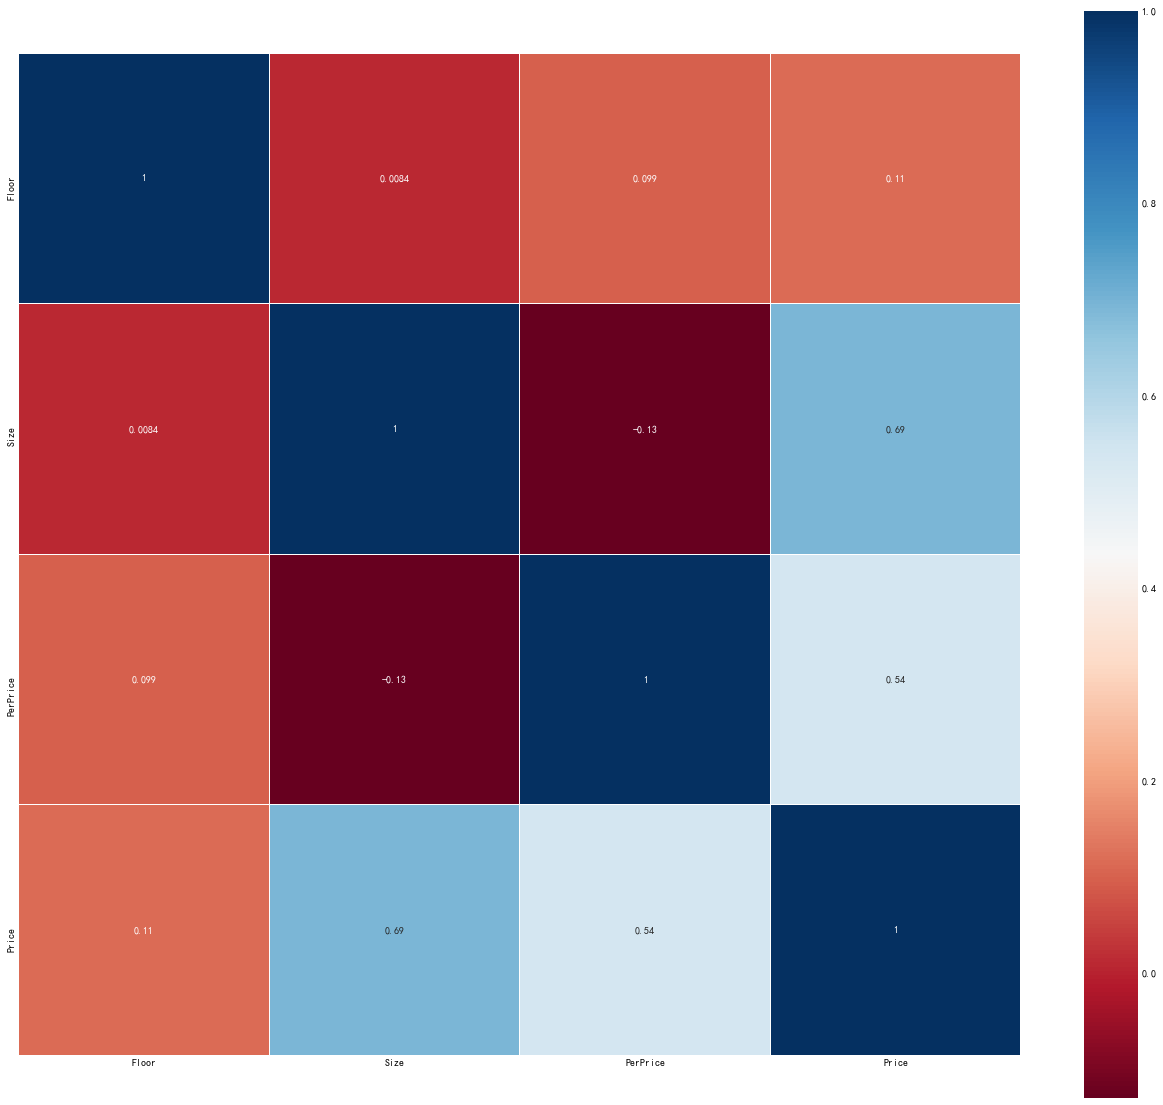

In [32]:
# data_corr 
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

颜色偏红或者偏蓝都说明相关系数较大，即两个特征对于目标变量的影响程度相似，即存在严重的重复信息，会造成过拟合现象。因此，通过特征相关性分析，我们可以找出哪些特征有严重的重叠信息，然后择优选择。
数据建模预测


为了方便理解，博主在建模上做了一些精简，模型策略方法如下：

使用Cart决策树的回归模型对二手房房价进行分析预测

使用交叉验证方法充分利用数据集进行训练，避免数据划分不均匀的影响。

使用GridSearchCV方法优化模型参数

使用R2评分方法对模型预测评分


上面的建模方法比较简单，旨在让大家了解建模分析的过程。随着逐渐的深入了解，博主会介绍更多实战内容。


数据划分

In [33]:
# 转换训练测试集格式为数组
features = np.array(features)
prices = np.array(prices)

# 导入sklearn进行训练测试集划分
from sklearn.model_selection import train_test_split
features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size=0.2, random_state=0)

NameError: name 'features' is not defined

将以上数据划分为训练集和测试集，训练集用于建立模型，测试集用于测试模型预测准确率。使用sklearn的 model_selection 实现以上划分功能。

建立模型

In [34]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 利用GridSearchCV计算最优解
def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    cross_validator = KFold(10, shuffle=True)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)
    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    # print pd.DataFrame(grid.cv_results_)
    return grid.best_estimator_

# 计算R2分数
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)
    return score

使用了 KFold 方法减缓过拟合，GridSearchCV 方法进行最优参数自动搜查，最后使用R2评分来给模型打分。

调参优化模型

In [36]:
import visuals as vs
# 分析模型
vs.ModelLearning(features_train, prices_train)
vs.ModelComplexity(features_train, prices_train)
optimal_reg1 = fit_model(features_train, prices_train)
# 输出最优模型的 'max_depth' 参数
print("最理想模型的参数 'max_depth' 是 {} 。".format(optimal_reg1.get_params()['max_depth']))
predicted_value = optimal_reg1.predict(features_test)
r2 = performance_metric(prices_test, predicted_value)
print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))

ModuleNotFoundError: No module named 'visuals'

由于决策树容易过拟合的问题，我们这里采取观察学习曲线的方法查看决策树深度，并判断模型是否出现了过拟合现象。以下是观察到的学习曲线图形：
观察，最理想模型的参数"max_depth"是10，此种情况下达到了偏差与方差的最优平衡，最后模型在测试数据上的R2分数，也即二手房房价预测的准确率为：0.81。

以上一个完整的从数据分析到挖掘的项目就结束了，对于项目而言比较简单，目的是让大家了解整个分析的过程。可提升改进的地方非常多，可以有更好更健壮的方案代替，一些改进思考如下：

获取更多有价值的特征信息，比如学区，附近地铁，购物中心等

完善特征工程，如进行有效的特征选择

使用更优秀的模型算法建模或者使用模型融合